In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from plotnine import * 
import os
import scipy
import matplotlib.pyplot as plt
import researchpy as rp
import seaborn as sns
import datetime
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
# Loading the CSV file into a pandas DataFrame
sales_df = pd.read_excel(r'c:\Users\leath\Downloads\sales(1).xlsx')

# Printing the DataFrame
print(sales_df)

       year     release_date                                 title  \
0      2000      January 1st                          Bakha Satang   
1      2001     January 12th                             Antitrust   
2      2000     January 28th                              Santitos   
3      2002  2002 (Wide) by                    Frank McKlusky C.I.   
4      2002     January 25th                    A Walk to Remember   
...     ...              ...                                   ...   
30607  2021      January 1st                Jokbeoldu sinmun iyagi   
30608  2021        March 5th                      My Salinger Year   
30609  2021      January 1st                     Escort Vehicle 36   
30610  2021         May 21st                               The Dry   
30611  2021      January 1st  Posledniy bogatyr. KorenÃ¢â‚¬â„¢ Zla   

                   genre  international_box_office  domestic_box_office  \
0                  Drama                   76576.0                  NaN   
1      Th

In [3]:
# Checking the first few rows of the dataframe
sales_df.head()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust
2,2000,January 28th,Santitos,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos
3,2002,2002 (Wide) by,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...
4,2002,January 25th,A Walk to Remember,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...


In [4]:
# Checking the last few rows of the dataframe
sales_df.tail()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
30607,2021,January 1st,Jokbeoldu sinmun iyagi,Documentary,12356.0,NaN,12356.0,NaN,NaN,NaN,NaN,NaN,168.0,NaN,Factual,https://www.the-numbers.com/movie/Jokbeoldu-si...
30608,2021,March 5th,My Salinger Year,Drama,914119.0,54730.0,968849.0,NaN,NaN,28851.0,123.0,2.0,101.0,Set in New York City,Contemporary Fiction,https://www.the-numbers.com/movie/My-Salinger-...
30609,2021,January 1st,Escort Vehicle 36,Action,240000.0,NaN,240000.0,NaN,NaN,NaN,NaN,NaN,85.0,NaN,Historical Fiction,https://www.the-numbers.com/movie/Escort-Vehic...
30610,2021,May 21st,The Dry,Thriller/Suspense,16987526.0,364397.0,17351923.0,NaN,NaN,119364.0,186.0,2.5,118.0,Crime Thriller,Contemporary Fiction,https://www.the-numbers.com/movie/Dry-The-(Aus...
30611,2021,January 1st,Posledniy bogatyr. KorenÃ¢â‚¬â„¢ Zla,Adventure,33396899.0,NaN,33396899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Super Hero,https://www.the-numbers.com/movie/Posledniy-bo...


In [5]:
# Checking for duplicates
duplicates = sales_df.duplicated().sum()
print(f"There are {duplicates} duplicates in this dataset")

There are 0 duplicates in this dataset


In [6]:
column_names = sales_df.columns

# Print all column names to check if column was dropped
for column in column_names:
    print(column)

year
release_date
title
genre
international_box_office
domestic_box_office
worldwide_box_office
production_budget
Unnamed: 8
opening_weekend
theatre_count
avg run per theatre
runtime
keywords
creative_type
url


In [7]:
# Removing some columns that are not needed
sales_df.drop(['year', 'release_date', 'international_box_office', 'domestic_box_office', 'Unnamed: 8', 'opening_weekend', 'url', 'creative_type', 'keywords'], inplace=True, axis=1)

# Checking the first few rows of the dataframe
sales_df.head()

,title,genre,worldwide_box_office,production_budget,theatre_count,avg run per theatre,runtime
0,Bakha Satang,Drama,76576.0,NaN,NaN,NaN,129.0
1,Antitrust,Thriller/Suspense,17865209.0,30000000.0,2433.0,3.1,NaN
2,Santitos,NaN,NaN,NaN,NaN,NaN,105.0
3,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN
4,A Walk to Remember,Drama,46060861.0,11000000.0,2411.0,5.3,NaN


In [8]:
# Check data types of columns in the DataFrame
data_types = sales_df.dtypes

print("Data types of columns:")
print(data_types)

Data types of columns:
title                    object
genre                    object
worldwide_box_office    float64
production_budget       float64
theatre_count           float64
avg run per theatre     float64
runtime                 float64
dtype: object


In [9]:
# Checking for NaN values
sales_df.isnull().sum()

title                       8
genre                    1704
worldwide_box_office     9037
production_budget       26132
theatre_count           19649
avg run per theatre     19660
runtime                  6053
dtype: int64

Missing values of numerical values will be filled with the mean of the column. 

In [10]:
# Extract the 'box office' column and fill missing values with the mean of non-missing values
sales_df['worldwide_box_office'] = sales_df['worldwide_box_office'].fillna(sales_df['worldwide_box_office'].mean())

# Extract the 'box office' column and fill missing values with the mean of non-missing values
sales_df['production_budget'] = sales_df['production_budget'].fillna(sales_df['production_budget'].mean())

# Extract the 'box office' column and fill missing values with the mean of non-missing values
sales_df['theatre_count'] = sales_df['theatre_count'].fillna(sales_df['theatre_count'].mean())

# Extract the 'box office' column and fill missing values with the mean of non-missing values
sales_df['avg run per theatre'] = sales_df['avg run per theatre'].fillna(sales_df['avg run per theatre'].mean())

# Extract the 'box office' column and fill missing values with the mean of non-missing values
sales_df['runtime'] = sales_df['runtime'].fillna(sales_df['runtime'].mean())

Doing feature engineering by cerating a new feature called "profit" by subtracting 'production_budget' from 'worldwide_box_office'. Profit should be used as dependent target variable.

In [11]:
# Create a new column 'profit' by subtracting 'production_budget' from 'worldwide_box_office'
sales_df['profit'] = sales_df['worldwide_box_office'] - sales_df['production_budget']

In [12]:
# Checking for NaN values
sales_df.isnull().sum()

title                      8
genre                   1704
worldwide_box_office       0
production_budget          0
theatre_count              0
avg run per theatre        0
runtime                    0
profit                     0
dtype: int64

The missing values of the categorical variable  genre will be replaced with "Unknown" as it doesn´t make sense to replace them with the median as that would change the data too much.

In [13]:
# Filling the missing object values by creating a dictionary and defining the new object values
sales_df = sales_df.fillna({'genre': 'Unknown'})

In [14]:
sales_df.head()

,title,genre,worldwide_box_office,production_budget,theatre_count,avg run per theatre,runtime,profit
0,Bakha Satang,Drama,7.657600e+04,3.642238e+07,723.14704,4.124562,129.000000,-3.634581e+07
1,Antitrust,Thriller/Suspense,1.786521e+07,3.000000e+07,2433.00000,3.100000,101.502993,-1.213479e+07
2,Santitos,Unknown,2.524796e+07,3.642238e+07,723.14704,4.124562,105.000000,-1.117442e+07
3,Frank McKlusky C.I.,Unknown,2.524796e+07,3.642238e+07,723.14704,4.124562,101.502993,-1.117442e+07
4,A Walk to Remember,Drama,4.606086e+07,1.100000e+07,2411.00000,5.300000,101.502993,3.506086e+07


In [15]:
# Loading the cleaned movie CSV file into a pandas DataFrame
file_path = r"c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\Movie_Cleaned.csv"
movie_df = pd.read_csv(file_path)

In [16]:
# Removing the genre column from the movie dataframe as it is already in the sales dataframe
movie_df.drop(['genre'], inplace=True, axis=1)

In [17]:
# Merge based on the "title" column
merged_df = pd.merge(movie_df, sales_df, on='title', how='inner')

merged_df.head()

,title,studio,rating,director,metascore,userscore,Age,RelMonth,top_actors_count,genre,worldwide_box_office,production_budget,theatre_count,avg run per theatre,runtime,profit
0,10 Cloverfield Lane,Paramount Pictures,PG-13,Dan Trachtenberg,76,7.700,8,3,1,Thriller/Suspense,1.082864e+08,1.500000e+07,3391.00000,4.900000,103.0,9.328642e+07
1,10 Years,Anchor Bay Entertainment,R,Jamie Linden,61,6.900,12,9,0,Drama,9.876400e+05,3.642238e+07,3.00000,2.100000,100.0,-3.543474e+07
2,100 Bloody Acres,Music Box Films,Not Rated,Cameron Cairnes,63,7.500,11,6,0,Black Comedy,2.524796e+07,3.642238e+07,13.00000,1.500000,91.0,-1.117442e+07
3,100 Streets,Samuel Goldwyn Films,Not Rated,Jim O'Hanlon,44,6.100,7,1,0,Drama,3.070000e+02,3.642238e+07,723.14704,4.124562,93.0,-3.642208e+07
4,1001 Grams,Kino Lorber,Not Rated,Bent Hamer,65,6.886,9,5,0,Drama,4.701900e+04,3.642238e+07,723.14704,4.124562,88.0,-3.637536e+07


In [18]:
# Removing the title column as it is not needed for the prediction
merged_df.drop(['title', 'studio', 'director'], inplace=True, axis=1)

In [19]:
# Checking for NaN values
merged_df.isnull().sum()

rating                  0
metascore               0
userscore               0
Age                     0
RelMonth                0
top_actors_count        0
genre                   0
worldwide_box_office    0
production_budget       0
theatre_count           0
avg run per theatre     0
runtime                 0
profit                  0
dtype: int64

There are not further missing values that need to be filled.

In [20]:
# Get the shape of the DataFrame
data_size = merged_df.shape

# Extract the number of rows and columns
num_rows, num_columns = data_size

# Print or use the size information as needed
print("Number of rows:", num_rows)

Number of rows: 8969


In [21]:
merged_df.describe()

,metascore,userscore,Age,RelMonth,top_actors_count,worldwide_box_office,production_budget,theatre_count,avg run per theatre,runtime,profit
count,8969.000000,8969.000000,8969.000000,8969.000000,8969.000000,8.969000e+03,8.969000e+03,8969.000000,8969.000000,8969.000000,8.969000e+03
mean,56.784480,6.521002,12.917828,6.783476,0.109265,5.574489e+07,3.776384e+07,956.264551,4.369079,102.633541,1.798105e+07
std,17.079524,1.292039,6.094689,3.334756,0.337402,1.384915e+08,3.019651e+07,1230.010688,2.658024,16.906962,1.187871e+08
min,1.000000,0.300000,3.000000,1.000000,0.000000,1.200000e+01,7.000000e+03,1.000000,0.000000,11.000000,-1.580898e+08
25%,45.000000,5.842056,8.000000,4.000000,0.000000,3.327957e+06,3.200000e+07,4.000000,2.800000,93.000000,-2.852238e+07
50%,58.000000,6.697326,12.000000,7.000000,0.000000,2.524796e+07,3.642238e+07,723.147040,4.124562,101.502993,-1.117442e+07
75%,70.000000,7.400000,18.000000,10.000000,0.000000,2.638704e+07,3.642238e+07,1714.000000,5.100000,108.000000,9.767275e+06
max,100.000000,9.700000,24.000000,12.000000,3.000000,2.845900e+09,4.000000e+08,4725.000000,76.200000,803.000000,2.608900e+09


In [22]:
merged_df.nunique()

rating                    13
metascore                 96
userscore                162
Age                       22
RelMonth                  12
top_actors_count           4
genre                     14
worldwide_box_office    5523
production_budget        367
theatre_count           1952
avg run per theatre      181
runtime                  137
profit                  5629
dtype: int64

**rating:** It´s showing the rating of the Motion Picture Association film rating system. It is meant to help parents and movie-goers decide which movie is suitable for their families and children. 

**metascore:** A diverse group of highly respected critics assigns scores to their movie reviews. The weighted average of those scores results in a single number, the Metascore.

**userscore:** The weighted average of the scores given by users of the Metacritic website.

**Age:** The age of the movie calculated from the release date of the movie to the current year.

**RelMonth:** The month in which the movie was released.

**top_actor_count:** The amount of top actors acting in a movie. The top actors were calculated by the amount of movies they were playing in of the dataset.

**genre:** The genre of the movie

**worldwide_box_office:** The total amount of money paid by people worldwide to watch a movie at cinemas/movie theaters.

**production_budget:** The total amount of money spend on producing the movie.

**theatre_count:** The number of theaters in which the movie was shown.

**avg run per theatre:** The average amount of times the movie was shown at a cinemas/movie theaters.

**runtime:** The time between the starting of the movie until the end of the credits scene.

**profit:** The total amount of money made from the movie after subtracting the production budget from the worldwide box office.

In [23]:
merged_df['RelMonth'].value_counts()

RelMonth
10    917
9     866
3     818
4     794
8     791
11    788
6     736
5     733
12    713
7     695
2     631
1     487
Name: count, dtype: int64

**Conclusion:** Most movies were released in October and lest movies in January. This could be due to seasonal influences.

c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


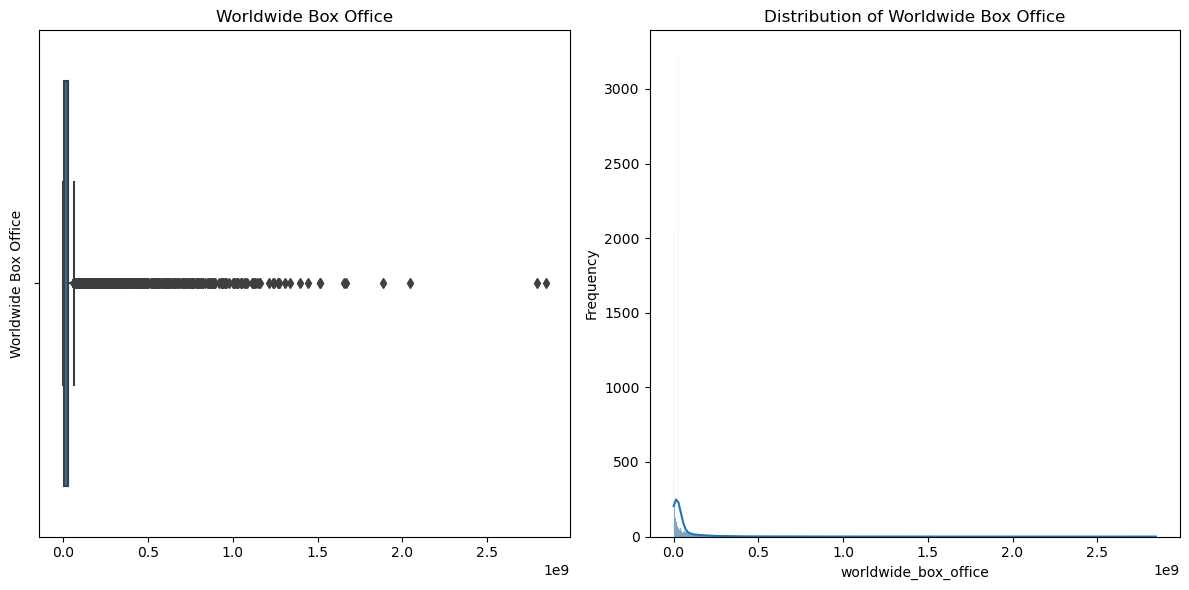

In [24]:
# Define the columns to plot and their titles
columns_to_plot = ['worldwide_box_office']
titles = ['Worldwide Box Office']

# Plot boxplots and bar diagrams for each column
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust the figsize for side-by-side plots

# Boxplot
sns.boxplot(x=columns_to_plot[0], data=merged_df, ax=axes[0])
axes[0].set_title(titles[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Worldwide Box Office')

# Barplot
sns.histplot(x=columns_to_plot[0], data=merged_df, kde=True, ax=axes[1])
axes[1].set_title('Distribution of ' + titles[0])
axes[1].set_xlabel(columns_to_plot[0])
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Conclusion:** The majority of movies have lower box office earnings, and a few movies achieve exceptionally high earnings, causing the distribution to be stretched to the right. These movies may be extremely successful, attracting large audiences and generating substantial revenue.

c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


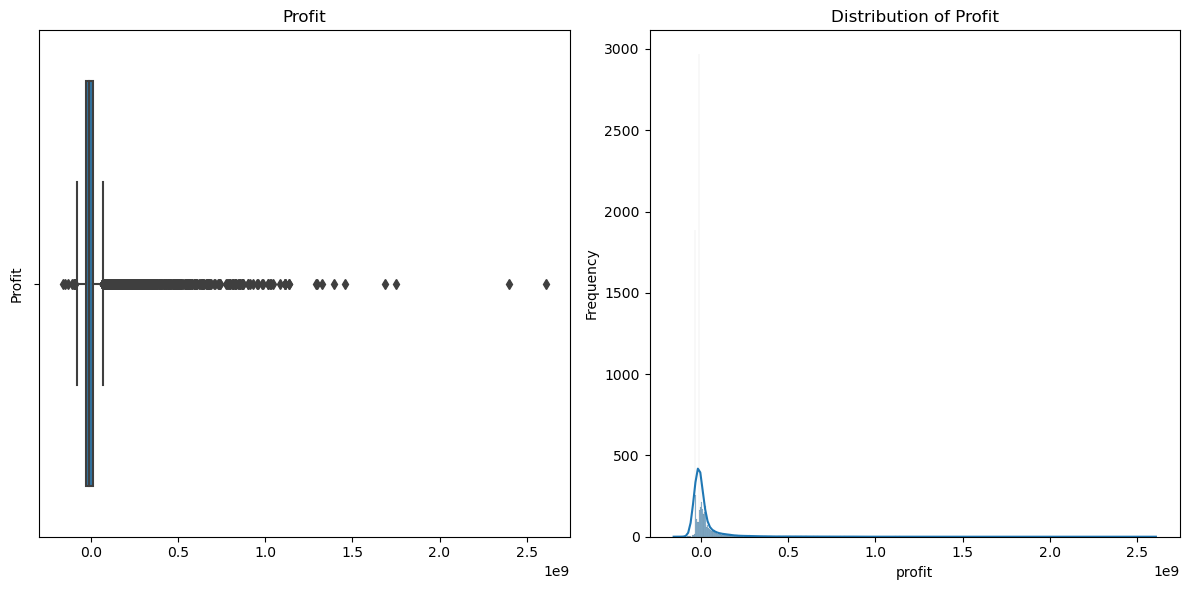

In [26]:
# Define the columns to plot and their titles
columns_to_plot = ['profit']
titles = ['Profit']

# Plot boxplots and bar diagrams for each column
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust the figsize for side-by-side plots

# Boxplot
sns.boxplot(x=columns_to_plot[0], data=merged_df, ax=axes[0])
axes[0].set_title(titles[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Profit')

# Barplot
sns.histplot(x=columns_to_plot[0], data=merged_df, kde=True, ax=axes[1])
axes[1].set_title('Distribution of ' + titles[0])
axes[1].set_xlabel(columns_to_plot[0])
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Conclusion:** Simialr to the worldwide_box_office, the majority of movies have lower profits, and a few movies achieve exceptionally high profits, causing the distribution to be stretched to the right. These movies may be extremely successful, attracting large audiences and generating substantial revenue.

In [28]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df['profit'].quantile(0.25)
Q3 = merged_df['profit'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

# Identify outliers using the bounds
outliers = merged_df[(merged_df['profit'] < lower_bound) | (merged_df['profit'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print or use the count as needed
print("Number of outliers in Profit:", num_outliers)

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(merged_df)) * 100

# Print or use the percentage as needed
print("Percentage of outliers in Profit: {:.2f}%".format(percentage_outliers))

Number of outliers in Profit: 89
Percentage of outliers in Profit: 0.99%


As the dataset is quite small, I don´t want to delete too many datapoints. Therefore I keep the percentage just under 1% to remove only the 89 most extreme outliers.

Number of outliers in profit: 89


c:\Users\leath\anaconda3\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


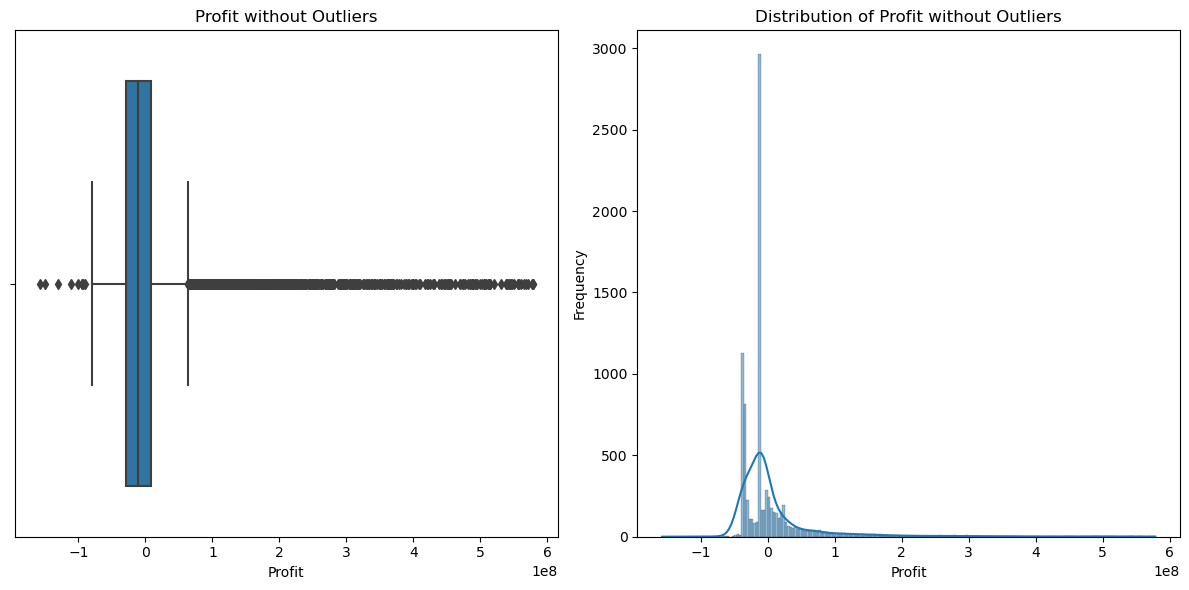

In [29]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 15 * IQR
    upper_bound = Q3 + 15 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'profit' column
merged_df_no_outliers = remove_outliers_iqr(merged_df, 'profit')

# Print or use the count as needed
num_outliers = len(merged_df) - len(merged_df_no_outliers)
print("Number of outliers in profit:", num_outliers)

# Plot boxplot and bar diagram for the 'profit' column without outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust the figsize for side-by-side plots

# Horizontal boxplot without outliers
sns.boxplot(x=merged_df_no_outliers['profit'], ax=axes[0], orient='h')
axes[0].set_title('Profit without Outliers')
axes[0].set_xlabel('Profit')
axes[0].set_ylabel('')

# Barplot
sns.histplot(x=merged_df_no_outliers['profit'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Profit without Outliers')
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Conclusion:** While the majority of movies have modest or average profits, there are a few movies that enjoy exceptional profitability, contributing significantly to the overall profit distribution. In the movie industry, profits are influenced by various factors such as production budgets, critical acclaim, audience reception, and other economic factors.

In [31]:
merged_df['genre'].value_counts()

genre
Drama                  2808
Documentary            1368
Comedy                 1221
Thriller/Suspense       890
Action                  590
Horror                  539
Adventure               533
Unknown                 389
Romantic Comedy         316
Black Comedy            144
Musical                  75
Western                  57
Concert/Performance      29
Multiple Genres          10
Name: count, dtype: int64

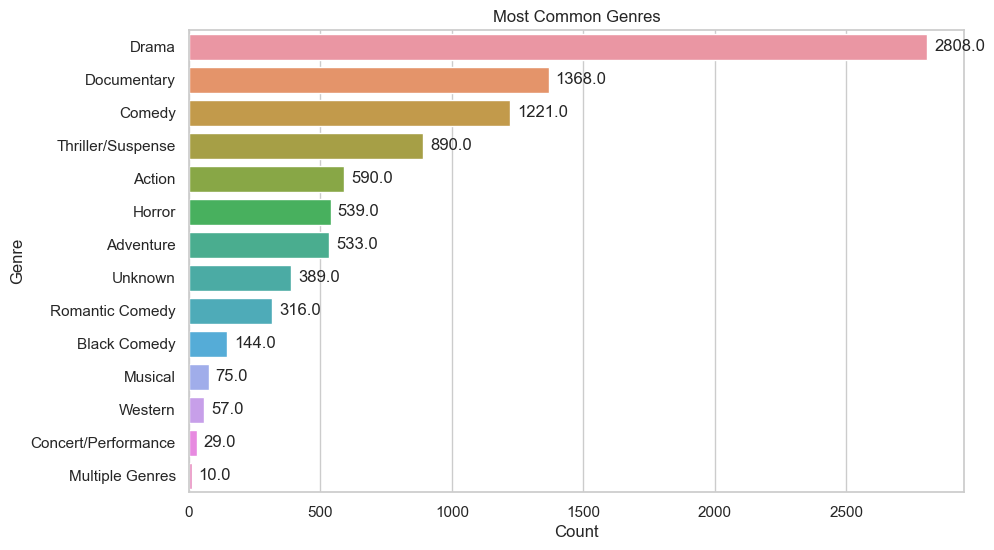

In [32]:
# Plotting the most common genre with value labels
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Setting a theme for Seaborn (optional)

# Create a countplot
ax = sns.countplot(y='genre', data=merged_df, order=merged_df['genre'].value_counts().index)

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Conclusion:** There are quite a lot of different genres of which some can be put together into one category.

In [33]:
merged_df['genre'] = merged_df['genre'].replace(['Romantic Comedy', 'Black Comedy'], 'Comedy')

In [34]:
merged_df['genre'] = merged_df['genre'].replace(['Action', 'Adventure'], 'Action/Adventure')

In [35]:
merged_df['genre'] = merged_df['genre'].replace(['Concert/Performance', 'Musical', 'Western'], 'Other')

In [36]:
merged_df['genre'] = merged_df['genre'].replace(['Multiple Genres'], 'Unknown')

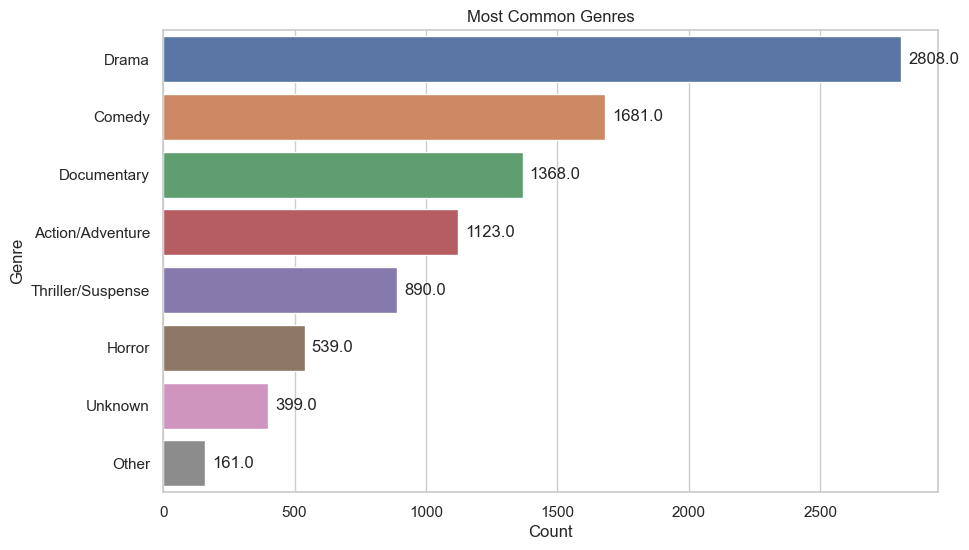

In [37]:
# Plotting the most common genre with value labels
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Setting a theme for Seaborn (optional)

# Create a countplot
ax = sns.countplot(y='genre', data=merged_df, order=merged_df['genre'].value_counts().index)

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Conclusion:** The genre which is most represented in the dataset is drama with even more than double of the third most represented genre. Drama is followed by comedy and documentary. The least represented genre is Horror (Excluding unknown and other).

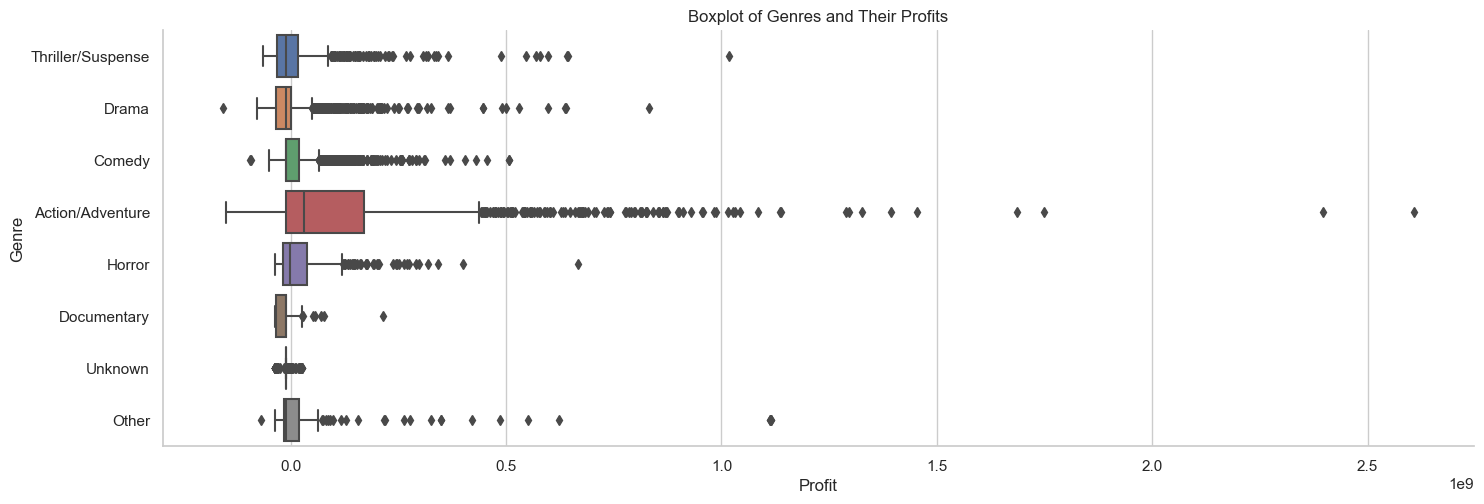

In [38]:
# Making a horizontal boxplot showing the genres and their profits
sns.catplot(data=merged_df, y="genre", x="profit", kind="box", aspect=3)

# Setting labels and title
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.title('Boxplot of Genres and Their Profits')

# Display the plot
plt.show()

**Conclusion:** The boxplot shows that the genres with the highest median profit are Action/Adventure, Animation, and Comedy. The genres with the lowest median profit are Documentary, Drama, and Horror. The boxplot also shows that the Action/Adventure genre has the most outliers, indicating that there are a few movies in this genre with very high profits.

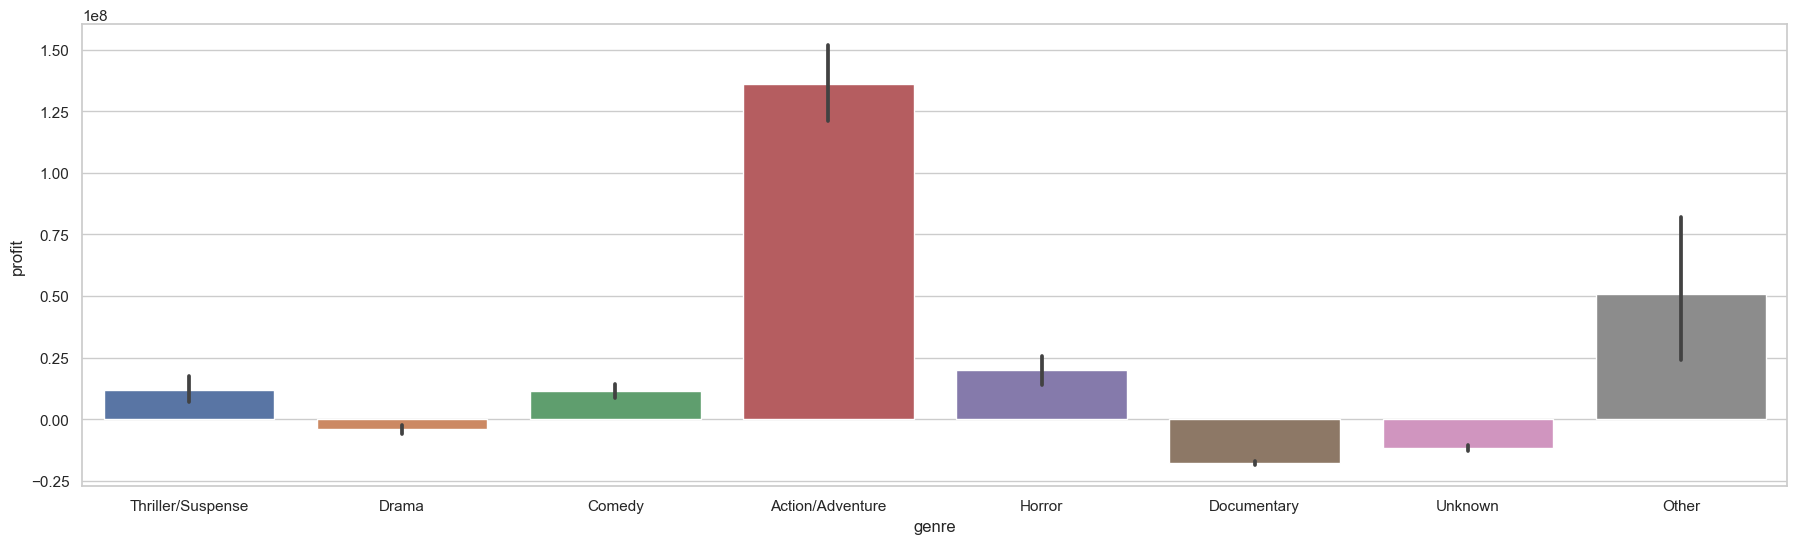

In [39]:
# Average of the profit of each genres
fig, ax = plt.subplots(figsize=(22, 6))
sns.barplot(data=merged_df, x='genre', y='profit')
plt.show()

**Conclusion:** The genres with the highest average profit are 'Action/Adventure', and 'Other'. The genres with the lowest average profit, which is even negative, are 'Documentary', 'Drama', and 'Unknown'.

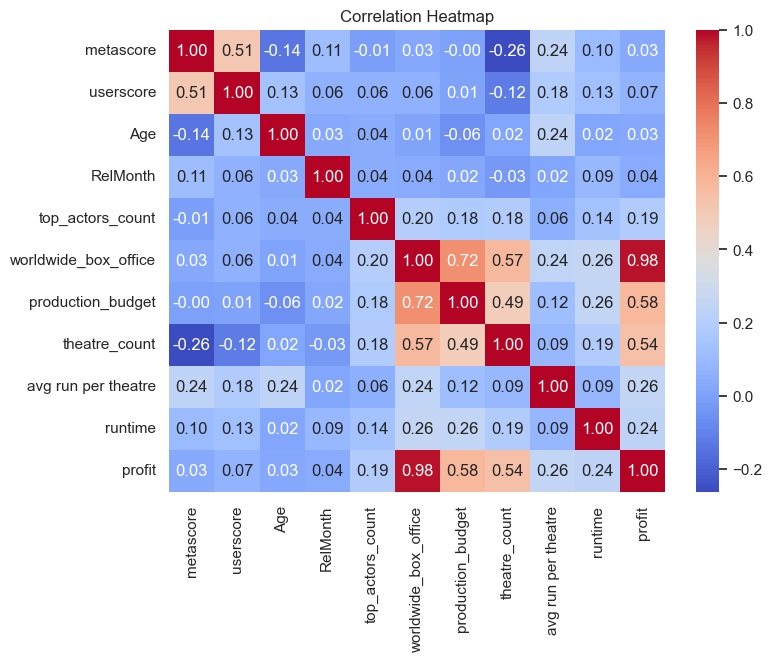

In [40]:
# Select numerical columns only
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
corr = merged_df[numerical_columns].corr()

# Plot the correlation heatmap with a smaller size
plt.figure(figsize=(8, 6))  # Adjust the figsize for a smaller heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

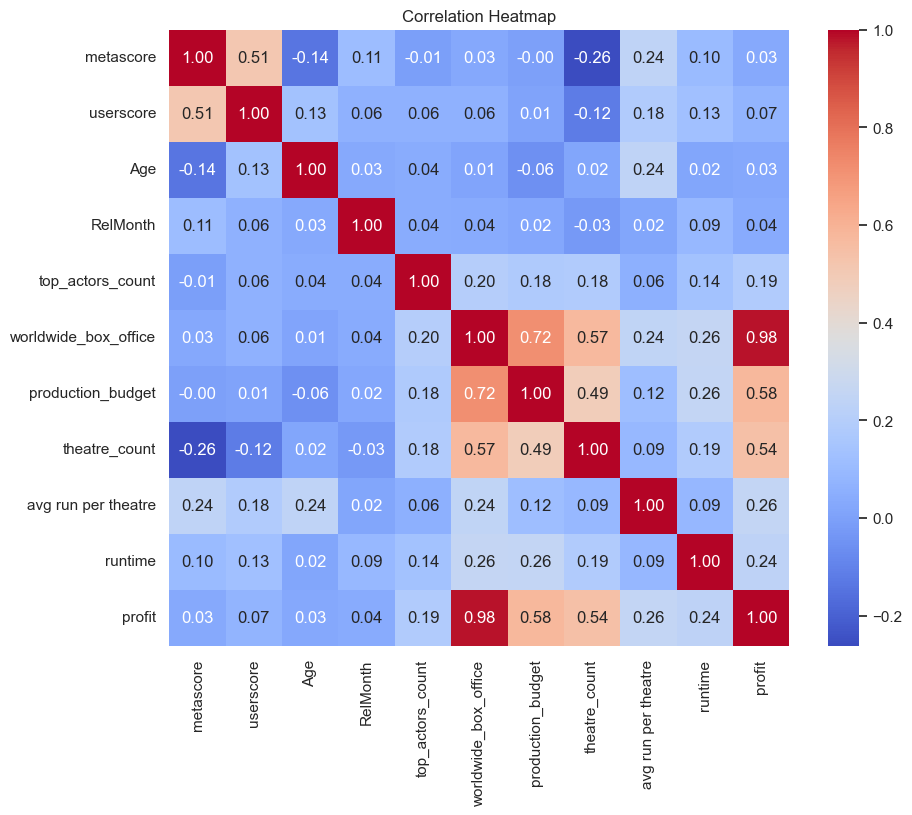

In [41]:
# Select numerical columns only
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
corr = merged_df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Conclusion:**
Positive Correlations:
Worldwide vox office and the profit have the highest correlation which makes sense as the profit was created with the worldwide box office. Their correlation is very strong. The profit also has a medium correlation with production budget as it also was part of it´s creation. Also the correlation of profit and theatre count is medium. It can be suggested that in the more theatres the movie was played, the higher the profit margin was. Same is between worldwide box office and theatre count and theatre count and production budget. The userscore and metascore have a medium correlation as well. ALl other variables have a weak to very weak correlation.

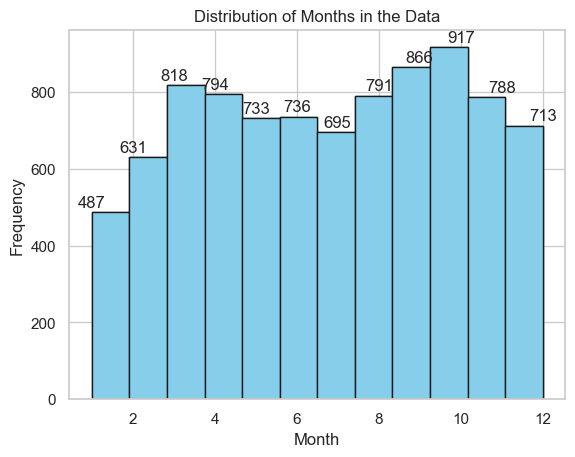

In [42]:
# Your existing code for histogram
plt.hist(merged_df['RelMonth'], bins=12, facecolor='skyblue', edgecolor='k')

# Adding values on top of each bar
for i, value in enumerate(plt.hist(merged_df['RelMonth'], bins=12, color='skyblue', edgecolor='k')[0]):
    plt.text(i + 1, value + 5, str(int(value)), ha='center', va='bottom')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Months in the Data')

# Display the plot
plt.show()

**Conclusion:** October is the month with most movies released in this dataset. In January the least amount of movies were released.

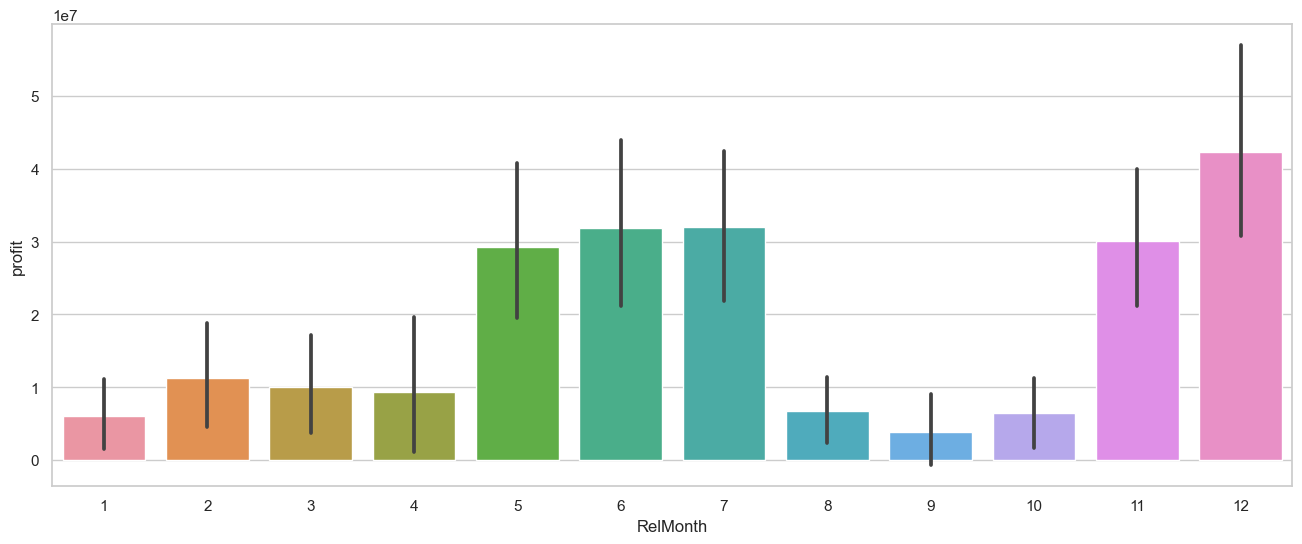

In [43]:
# Average profit per month
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=merged_df, x='RelMonth', y='profit')
plt.show()

**Conclusion:** On avergae the profit is the highest in the month of December, followed by July, June, November and May. Compared to those months, the average revenue of the remaining months is quite low. The month with the lowest profit on average is September, followed by January.

## One-way Anova

**Checking assumptions:**

Homogeneity of Variance

Null Hypothesis (H₀): Homogeneity of Variances

    The null hypothesis assumes that the variances of the groups are equal or homogeneous.

Alternative Hypothesis (H₁): Lack of Homogeneity of Variances

    The alternative hypothesis suggests that at least one group has a different variance compared to the others.

In [44]:
from scipy.stats import levene

group_column = 'genre'
dependent_variable = 'profit'

# Extract data for each group
groups = merged_df[group_column].unique()
group_data = [merged_df[dependent_variable][merged_df[group_column] == group] for group in groups]

# Perform Levene's test for homogeneity of variance
statistic, p_value = levene(*group_data)

# Display the results
print(f'Levene\'s Test Statistic: {statistic}')
print(f'p-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('The p-value is less than the significance level. Reject the null hypothesis. (Not homogenous variance)')
else:
    print('Fail to reject the null hypothesis. (Homogenous variance)')

Levene's Test Statistic: 229.59242675939873
p-value: 3.71559643e-315
The p-value is less than the significance level. Reject the null hypothesis. (Not homogenous variance)


Conclusion: Therefore, the assumption for Anova is not met. Also as seen before, the profit is not normally distributed as well. This means that a violation of homoscedasticity can lead to biased standard errors, affecting the precision of parameter estimates and hypothesis tests. Unequal variances can result in an increased risk of Type I or Type II errors. Therefore, the results of the Anova test below cannot be trusted.

**Anova-test:**

Null Hypothesis (H0​): There is no significant difference in the mean profits among different genres.

Alternative Hypothesis (Ha​): There is a significant difference in the mean profits among different genres.

In [45]:
# List to store box office values for each genre
genre_groups = []

# Get unique genres
unique_genres = merged_df['genre'].unique()

# Collect box office values for each genre
for genre in unique_genres:
    genre_groups.append(merged_df[merged_df['genre'] == genre]['profit'])

# Perform one-way ANOVA
anova_result = stats.f_oneway(*genre_groups)

# Print the ANOVA result
print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-value: 231.62661955673252
ANOVA p-value: 9.07991e-318


A high F-value indicates that the means of at least two groups are different, suggesting that there is a significant difference in group means. In this case, a large F-value (231.63) suggests that there are significant differences in profit across different genres.

A very low p-value (close to zero) indicates that the observed differences in means are unlikely to be due to random chance alone.
In this case, the extremely low p-value (9.07991e-318, effectively zero) suggests strong evidence against the null hypothesis that there are no differences in profit across genres.

In [46]:
# Saving the DataFrame as a CSV file
csv_file = r"c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\Merged_Cleaned.csv"
merged_df.to_csv(csv_file, index=False)

print(f"CSV file '{csv_file}' has been created.")

CSV file 'c:\Users\leath\Documents\AUAS\0. Completed\7. AI Methods in Business\Resit\Merged_Cleaned.csv' has been created.
